<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/Practice_(sigmoid%2C_relu).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

In [0]:
batch_size = 50

a1 = tf.Variable(tf.random_normal(shape=[1, 1]))
b1 = tf.Variable(tf.random_normal(shape=[1, 1]))
    
a2 = tf.Variable(tf.random_normal(shape=[1, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1, 1]))  
  
x = np.random.normal(2, 0.1, 500)  
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [0]:
sigmoid = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

In [0]:
target = 0.75
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid, target)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu, target)))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.01)

train_sigmoid = optimizer.minimize(loss1)
train_relu = optimizer.minimize(loss2)

In [7]:
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [0]:
loss_sigmoid = []
loss_relu = []
activation_sigmoid = []
activation_relu = []

for i in range(750):
  rand_indices = np.random.choice(len(x), size=batch_size)
  x_vals = np.transpose([x[rand_indices]])
  
  sess.run(train_sigmoid, feed_dict={x_data: x_vals})
  sess.run(train_relu, feed_dict={x_data: x_vals})
  
  loss_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
  loss_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))
  
  activation_sigmoid.append(np.mean(sess.run(sigmoid, feed_dict={x_data: x_vals})))
  activation_relu.append(np.mean(sess.run(relu, feed_dict={x_data: x_vals})))    

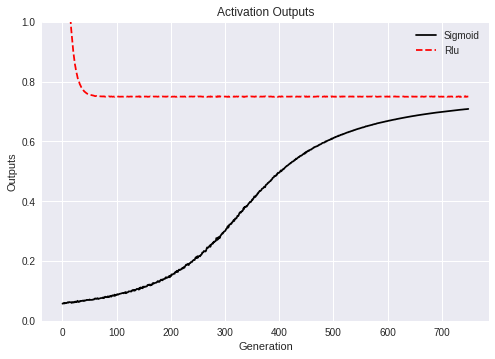

In [9]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid')
plt.plot(activation_relu, 'r--', label='Rlu')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

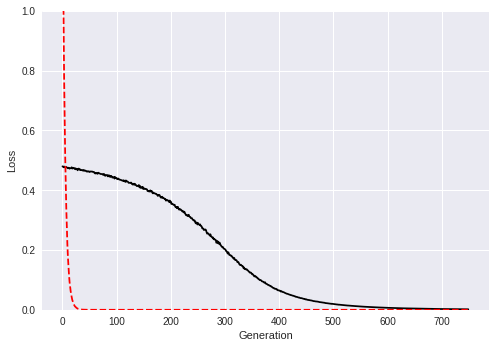

In [10]:
plt.plot(loss_sigmoid, 'k-', label='Sigmoid loss')
plt.plot(loss_relu, 'r--', label='Relu loss')
plt.ylim([0, 1.0])
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()